# Twitter Trend in Canada
From the Analysis performed in the [EDA](https://github.com/vcuspinera/Canada_response_covid/blob/master/src/eda.ipynb), we detect that tweets increase after March 10th and start decreasing after March 19th, 2020.

From this reason we download the Twitter Trend in Canada from March 10th to 19th, at 10:00 and 18:00 hours of each day, from the [GetDayTrends](https://getdaytrends.com/canada/) webpage. In this Jupyter notebook we share the results of this brief analysis.

## Load libraries and open dataset

In [1]:
# General libraries
import pandas as pd
import numpy as np
import time

# To plot
import altair as alt
alt.renderers.enable('mimetype')


RendererRegistry.enable('mimetype')

In [2]:
START = time.time()

# Parameters
my_folder = "../tweets/"

# Open the file
df = pd.read_csv(my_folder + 'twitter_trend.csv')

## Analysis

In [3]:
df.head(6)

,day,hr,rank,twitter_trend,hashtag,count (thousands)
0,10-Mar,10,1,#ThankYouNamjoon,yes,209.7
1,10-Mar,10,2,#TuesdayThoughts,yes,18.4
2,10-Mar,10,3,#LateLateNiall,yes,52.4
3,10-Mar,10,4,#CoreyFeldman,yes,Under 10
4,10-Mar,10,5,#MYTRUTHDOC,yes,Under 10
5,10-Mar,10,6,italy,no,710.9


In [4]:
# Change "Under 10" to 10, in "count (thousands)" variable.
df['tweets'] = [10 if i=="Under 10" else float(i) for i in df['count (thousands)']]
df.head(6)

,day,hr,rank,twitter_trend,hashtag,count (thousands),tweets
0,10-Mar,10,1,#ThankYouNamjoon,yes,209.7,209.7
1,10-Mar,10,2,#TuesdayThoughts,yes,18.4,18.4
2,10-Mar,10,3,#LateLateNiall,yes,52.4,52.4
3,10-Mar,10,4,#CoreyFeldman,yes,Under 10,10.0
4,10-Mar,10,5,#MYTRUTHDOC,yes,Under 10,10.0
5,10-Mar,10,6,italy,no,710.9,710.9


### Twitter trend

In [5]:
# Stats by twitter_trend
df_2 = df.groupby(['twitter_trend', 'hashtag'])['tweets'].agg(['count', 'mean', 'min', 'max']).reset_index()

df_2['total'] = df_2['count'] * df_2['mean']
df_2.sort_values(by=['total', 'count', 'count'], ascending=False, inplace=True)
df_2.reset_index(drop=True, inplace=True)
my_sort = list(df_2.twitter_trend)
df_2.head()

,twitter_trend,hashtag,count,mean,min,max,total
0,COVID-19,no,3,4466.666667,2400.0,5600.0,13400.0
1,China,no,6,1933.333333,1200.0,3400.0,11600.0
2,#COVID19,yes,3,2400.000000,1000.0,3200.0,7200.0
3,italy,no,7,797.628571,524.4,1100.0,5583.4
4,Biden,no,2,2300.000000,1800.0,2800.0,4600.0


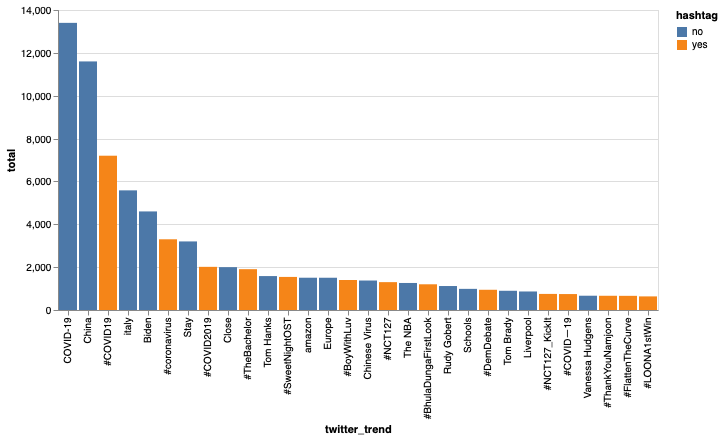

In [6]:
# Plot
alt.Chart(df_2[:30]).mark_bar().encode(
    alt.X('twitter_trend', sort=my_sort),
    alt.Y('total'),
    alt.Color('hashtag'),#, sort=['yes','no'])
    tooltip=['twitter_trend', 'total', 'hashtag']
)

### Only hashtags (#)

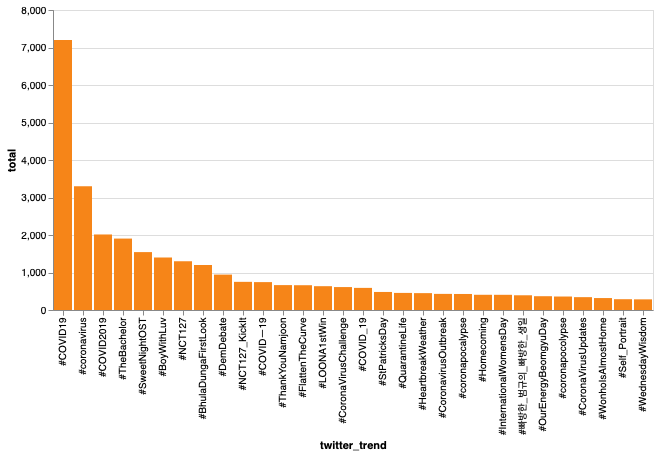

In [7]:
# Plot
alt.Chart(df_2[df_2.hashtag=='yes'][:30]).mark_bar(color='#F68518').encode(
    alt.X('twitter_trend', sort=my_sort),
    alt.Y('total'),
#     alt.Color('hashtag'),#, sort=['yes','no'])
    tooltip=['twitter_trend', 'total', 'hashtag']
)

### Heatmap

In [8]:
df_3 = df.pivot(index=['twitter_trend', 'hashtag'], columns=['day', 'hr'], values='tweets').fillna(0)
df_3['repetitions'] = df_3.astype(bool).sum(axis=1)
df_3['my_mean'] = df_3.mean(axis=1)
df_3 = df_3.reset_index()
df_3 = df_3.set_index('twitter_trend').loc[my_sort].reset_index()
df_3

day     twitter_trend hashtag 10-Mar         11-Mar          12-Mar       \
hr                                10     18      10      18      10   18   
0            COVID-19      no    0.0    0.0     0.0     0.0  2400.0  0.0   
1               China      no    0.0    0.0     0.0     0.0  1200.0  0.0   
2            #COVID19     yes    0.0    0.0  1000.0     0.0     0.0  0.0   
3               italy      no  710.9  776.8     0.0   524.4   803.6  0.0   
4               Biden      no    0.0    0.0     0.0  2800.0  1800.0  0.0   
..                ...     ...    ...    ...     ...     ...     ...  ...   
733             mccaw      no   10.0    0.0     0.0     0.0     0.0  0.0   
734  nathan mackinnon      no    0.0    0.0     0.0    10.0     0.0  0.0   
735      santé canada      no    0.0    0.0     0.0     0.0     0.0  0.0   
736  wheel of fortune      no    0.0   10.0     0.0     0.0     0.0  0.0   
737      Éric Salvail      no    0.0   10.0     0.0     0.0     0.0  0.0   

day  13-Mar        ...  16-Mar      17-Mar       18-Mar       19-Mar          \
hr       10    18  ...      10   18     10   18      10   18      10      18   
0    5600.0   0.0  ...     0.0  0.0    0.0  0.0  5400.0  0.0     0.0     0.0   
1    1900.0   0.0  ...  1700.0  0.0    0.0  0.0     0.0  0.0     0.0  3400.0   
2       0.0   0.0  ...     0.0  0.0    0.0  0.0  3000.0  0.0  3200.0     0.0   
3     909.5   0.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   
4       0.0   0.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   
..      ...   ...  ...     ...  ...    ...  ...     ...  ...     ...     ...   
733     0.0   0.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   
734     0.0   0.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   
735     0.0  10.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   
736     0.0   0.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   
737     0.0   0.0  ...     0.0  0.0    0.0  0.0     0.0  0.0     0.0     0.0   

day repetitions     my_mean  
hr                           
0             3  638.238095  
1             6  552.666667  
2             3  343.000000  
3             7  266.209524  
4             2  219.142857  
..          ...         ...  
733           1    0.523810  
734           1    0.523810  
735           1    0.523810  
736           1    0.523810  
737           1    0.523810  

[738 rows x 24 columns]

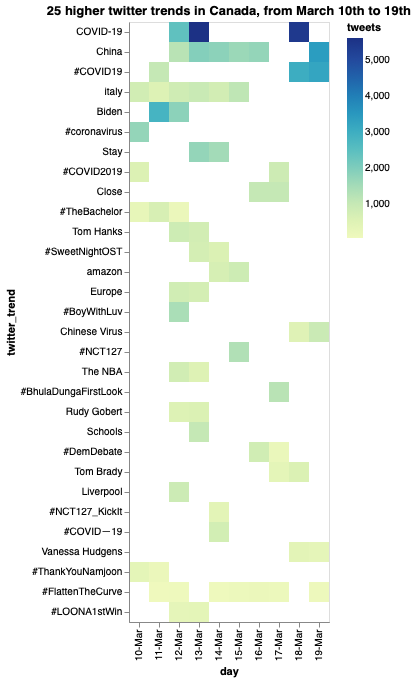

In [9]:
# Heatmap
df_4 = pd.merge(df, pd.DataFrame(my_sort[:30]).rename(columns={0:"twitter_trend"}), how="inner", on=["twitter_trend", "twitter_trend"])
df_4
alt.Chart(df_4).mark_rect().encode(
    alt.Y('twitter_trend:O', sort=my_sort),
    x='day:O',
    color='tweets:Q',
    tooltip=['twitter_trend', 'day', 'tweets']
).properties(
    title="25 higher twitter trends in Canada, from March 10th to 19th"
)

In this twitter trends in Canada from March 10th to 19th, we found that 5 of the 25 higher trends were related with Covid Virus (`COVID-19`, `#COVID19`, `#coronavirus`, `#COVID2019`, `Chinese Virus`), which represent 20% of the higher twitter trends.

In [10]:
print("Total time to run this notebook:", np.round((time.time() - START), 2), "seconds.")

Total time to run this notebook: 0.39 seconds.
